# Modeling Outbound Reach Rate of a Call Center 


    Course: Machine Learning
    Instructor: Mehmet Gönen
    
    Name : Waris Gill
    ID   : 0067664
    
    For better results check the html file or run jupyter notebook.

### Packages required for the Assignment
(I have used some of the packages in the assignment, and other are just for testing and for experimentation) 

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings  
warnings.filterwarnings('ignore')

In [2]:
dfx = pd.read_csv("training_data.csv")
dfy = pd.read_csv("training_labels.csv",header=None)
X = dfx.values
Y = dfy.values

seed = 7
scoring = 'roc_auc' # scoring parameter 


# For Dimensionality Reduction
The one of the most important step in ML experiments is to extract the useful feature from the given features. By reducing the number of features our model will run faster and will have better performance. So, to extract useful features I have tried different algorithms and for our data I have found that decesion tree based feature extraction perfoms really good and run faster. Below code ranks the features from highest to lowest i.e 1st feature is more importance as compared the 2nd and so on. 

And I have found that first top 8 to 12 are enough to train our model but I have used more than these features to see the performance and score but it did not make any difference. 

Feature ranking:
1. feature 69 (0.076693)
2. feature 73 (0.072393)
3. feature 71 (0.070356)
4. feature 1 (0.066811)
5. feature 0 (0.054096)
6. feature 123 (0.038272)
7. feature 68 (0.037923)
8. feature 72 (0.035266)
9. feature 122 (0.032122)
10. feature 70 (0.027352)
11. feature 35 (0.013530)
12. feature 74 (0.013431)
13. feature 6 (0.013163)
14. feature 4 (0.011273)
15. feature 98 (0.010585)
16. feature 127 (0.010159)
17. feature 80 (0.009836)
18. feature 133 (0.009655)
19. feature 97 (0.009535)
20. feature 131 (0.009386)
21. feature 8 (0.009248)
22. feature 130 (0.009083)
23. feature 132 (0.009051)
24. feature 134 (0.009011)
25. feature 5 (0.008996)
26. feature 126 (0.008917)
27. feature 104 (0.008914)
28. feature 125 (0.008847)
29. feature 79 (0.008841)
30. feature 128 (0.008838)
31. feature 124 (0.008810)
32. feature 116 (0.008510)
33. feature 95 (0.008471)
34. feature 91 (0.008217)
35. feature 103 (0.008190)
36. feature 139 (0.008121)
37. feature 88 (0.008106)
38. feature 138 (0.0

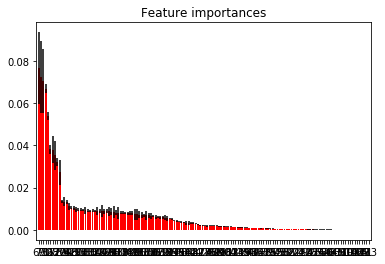

Indices of features  : [ 69  73  71   1   0 123  68  72 122  70  35  74   6   4  98 127  80 133
  97 131   8 130 132 134   5 126 104 125  79 128 124 116  95  91 103 139
  88 138  21 140  87   9  11  96 136 101 137 117 106  57  86  67 112 135
 111  90 129  85  17 115  49  60  63  83 141  62  48  44  32   7 118  77
  28  76  43  99  58  29  18 108  16 100  34  13 114  23 110 119  19  84
  56  78  40  36  75 121  47  38  59  65  92  52  15  45  55  53  89  82
  27  22  12  24   2 120  51  94  26  42  25  39  14  37  54  30  20  64
  66  81   3  31  50  61  10 107  93 102  46 105 109  33  41 113]


In [24]:
num_trees = 64
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators= 24,random_state=seed)
# forest = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# RandomForestClassifier(n_estimators=num_trees,random_state=seed, max_depth = 3, min_samples_leaf=4)
forest.fit(X, np.ravel(Y))
importances = forest.feature_importances_
# print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
print("Indices of features  :",indices)

# Different Models
Here are the different set of models which I have used during my assignment to find the best model. And after fine tuning of hyperparameters I have found that Stochastic Gradient Boosting (a boosting algorithm which is similar to adaboos) performs better as compared to other algorithms. 

In all these models I have used scoring parameter = AUROC value because it is required in the assignment. 

(The predictive quality of your solution will be evaluated in terms of its AUROC value on the test set.)

The other faster algorithm was logistic regression it was surprisingly running fast and its AUC was very close to SGB. 


### 1. Bagged Decision Trees for Classification

In [5]:
def BDTC(X,Y,num_trees,kfold):
    cart = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
    print(results.mean())
    print("AUC:", results.mean())
    print("Std:", results.std())

### 2. Random Forest Classifier

In [6]:
def RFC(X,Y,num_trees,kfold):
    max_features = 20 # ignored
    model = RandomForestClassifier(n_estimators=num_trees,random_state=seed, max_depth = 3)

    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
#     print(results.mean())
#     print("AUC:", results.mean())
#     print("Std:", results.std())
    return results.mean()

### 3. Extra Tree Classifier

In [7]:
def EXT(X,Y,num_trees,kfold):
    model = ExtraTreesClassifier(n_estimators=num_trees,random_state=seed)
    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
    return results.mean()

### 4. Stochastic Gradient Boosting

In [8]:
def SGB (X,Y,num_trees,kfold): 
    model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
#     print(results.mean())
#     print("AUC:", results.mean())
#     print("Std:", results.std())
    return results.mean()

### 5. Voting Ensemble

In [9]:
def voting(X,Y,num_trees,kfold):
    # create the sub models
    estimators = []
    
    model1 = LogisticRegression()
#     model2 = QuadraticDiscriminantAnalysis()
#     model3 = GaussianNB()
#     model4 = DecisionTreeClassifier(random_state=seed,max_depth = 3)
    model5 = RandomForestClassifier(n_estimators=num_trees,random_state=seed, max_depth = 3, min_samples_leaf=4)
    model6 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
    
    estimators.append(('m1', model1))
#     estimators.append(('m2', model2))  
#     estimators.append(('m3', model3))
# #     estimators.append(('m4', model4))
    estimators.append(('m5', model5))
    estimators.append(('m6', model6))
    
    
    # create the ensemble model
    model = VotingClassifier(estimators,voting="soft")
    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
    return results.mean()

###  6. More Models

In [10]:
def algo1_LogisticRegression(X,Y,kfold):    
#     print("Features ",X.shape[1])
    model = LogisticRegression()
    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
    print("Logistic Reg :", results.mean())
    return results.mean()


def algo2_QDA(X,Y,kfold):    
#     print("Features ",X.shape[1])
    model = QuadraticDiscriminantAnalysis()
    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
    print("QDA :", results.mean())
    return results.mean()

def algo3_GaussianNB(X,Y,kfold):
#     print("Features ",X.shape[1])
    model = GaussianNB()
    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
    print("GaussianNB :", results.mean())
    return results.mean()

def algo4_tree(X,Y,kfold):
    model = DecisionTreeClassifier(random_state=seed,max_depth = 3)
    results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
    print("Tree :", results.mean())
    return results.mean()

# def algo4_LinearSVC(X,Y,kfold):
#     model = LinearSVC(random_state=seed, tol=1e-5)
#     results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
#     print("Linear SVC :", results.mean())
#     return results.mean()

# def algo5_SVC(X,Y,kfold):
# #     print("Features ",X.shape[1])
#     model = SVC(gamma='auto')
#     results = model_selection.cross_val_score(model, X,np.ravel(Y), cv=kfold, n_jobs=-1,scoring=scoring)
#     print("SVC :", results.mean())
#     return results.mean()




# Best Model With Optimize set of Parameters

In [28]:
print("****************  More Accurate Solution **********************")

num_features = 36
selected_feature_indices=indices[:num_features]
folds = 10
num_trees = 64

kfold = model_selection.StratifiedKFold(n_splits=folds, random_state=None, shuffle=True)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
param_grid = {'n_estimators': [64]}

grid_clf = GridSearchCV(estimator=model,param_grid =param_grid ,cv=kfold,scoring=scoring)
grid_clf.fit(np.take(X,selected_feature_indices,axis=1),np.ravel(Y))

Xtest = pd.read_csv("test_data.csv").values
Xtest=np.take(Xtest,selected_feature_indices,axis=1)
final_probs = grid_clf.predict_proba(Xtest)

file_name = "predicted_probs.csv"
np.savetxt(file_name,np.take(final_probs,[1],axis=1),delimiter=",")

print(final_probs)
print("AUC = ",grid_clf.best_score_) 
print("Probabilities on the test data are written to the file  : ", file_name)

****************  More Accurate Solution **********************
[[0.66267808 0.33732192]
 [0.81379426 0.18620574]
 [0.97679922 0.02320078]
 ...
 [0.90881294 0.09118706]
 [0.91880553 0.08119447]
 [0.91880553 0.08119447]]
AUC =  0.7629894190764027
Probabilities on the test data are written to the file  :  predicted_probs.csv


# Experiments With Different Models

In this section I have run differnet algorithms to tune the hyper paramerters. You can uncomment the below section to see the different models in action.

In [12]:
def comparison(X,Y,num_trees,folds):
    #     print("Features: ", X.shape[1])
    kfold = model_selection.StratifiedKFold(n_splits=folds, random_state=seed, shuffle=True)
    
    #     algo1_LogisticRegression(X,Y,kfold)
    #     algo2_QDA(X,Y,kfold)
    #     algo3_GaussianNB(X,Y,kfold)
    auc1 = RFC(X,Y,num_trees,kfold)
    auc1 = round(auc1,4)
    auc2 = SGB(X,Y,num_trees,kfold)
    auc2 = round(auc2,4)
    #     auc3 = voting(X,Y,num_trees,kfold) 
    #     auc3 = round(auc3,3)
    #     algo2_LinearSVC(X,Y,kfold)
    #     algo3_SVC(X,Y,kfold)
    print("Feature = {feature}, Trees = {trees}, Folds = {folds}, AUC_F = {auc1}, AUC_G={auc2}".format(
        feature=X.shape[1],trees=num_trees,folds=folds,auc1=auc1,auc2=auc2))
    
    return None

    
# features_nums = [12,18]
# tree_nums = [34,64,128]
# kfolds = [10,20]

# print(X.shape,Y.shape)
# for kf in kfolds: 
#     print("****************** kf = {kf} **************************".format(kf=kf))
#     for t in tree_nums:
#         print("\n\n")
#         for f in features_nums:
#             selected_feature_indices=indices[:f]
#             comparison(np.take(X,selected_feature_indices,axis=1),Y,t,kf)